# Buffon's Needle

In [10]:
import numpy as np

def drop_needle(n=100):
    return np.c_[
                 np.random.uniform(low=0.0, high=1/2, size=n),
                 np.random.uniform(low=0.0, high=np.pi/2, size=n)
                ]

drop_needle(n=10)

array([[0.26667899, 0.21642603],
       [0.19820161, 1.0613306 ],
       [0.31927154, 1.46328105],
       [0.19327295, 0.96069707],
       [0.14418484, 0.08787517],
       [0.26460794, 1.55197477],
       [0.4185071 , 1.49475863],
       [0.35568265, 1.03417208],
       [0.13258247, 0.21229832],
       [0.45008707, 1.08678685]])

In [21]:
error = 0.0001
n = int(1/error**2)
needles = drop_needle(n=n)

In [22]:
needles_crossing = needles[:,0] < (1/2 * np.sin(needles[:,1]))
2 / needles_crossing.sum()

3.1417147076735e-08

## Exercises

3. Alter the program MonteCarlo to estimate the area of the circle of radius 1/2 with center at (1/2, 1/2) inside the unit square by choosing 1000 points at random. Compare your results with the true value of π/4. Use your results to estimate the value of π. How accurate is your estimate?

$\sqrt{(x - x_1)^2 + (y - y_1)^2} = r$

In [10]:
import numpy as np
dots = np.random.uniform(0,1,(1000,2))
def in_circle(points):
    x,y = points[:,0],points[:,1]
    return np.sqrt((x-1/2)**2 + (y - 1/2)**2) <= 1/2

in_circle(dots).sum() / len(dots)

0.79

In [11]:
np.pi/4

0.7853981633974483

4. Alter the program MonteCarlo to estimate the area under the graph of $y = \sin(πx)$ inside the unit square by choosing 10,000 points at random. Now calculate the true value of this area and use your results to  stimate the value of $π$. How accurate is your estimate?

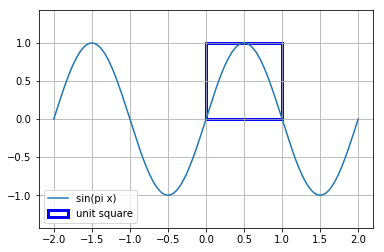

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
x = np.linspace(-2,2,1000)
y = np.sin(np.pi * x)
plt.plot(x,y, label='sin(pi x)')

rect = patches.Rectangle((0,0),1,1,fill=False,linewidth=3,color='b', label='unit square')
plt.gca().add_patch(rect)
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

In [40]:
dots = np.random.uniform(0,1,(100000, 2))

def under_curve(points):
    x,y = points[:,0],points[:,1]
    return y <= np.sin(np.pi * x)

under_curve(dots).sum() / len(dots)

0.63721

The true area is: 
$\int_{0}^{1} \sin(\pi x) \,dx = - \frac{\cos(\pi x)}{\pi} \Big|_0^1 = \frac{2}{\pi} \approx 0.6366197723675814$ 

7. For Buffon’s needle problem, Laplace considered a grid with horizontal and vertical lines one unit apart. He showed that the probability that a needle of length L ≤ 1 crosses at least one line is
<center>$p = \frac{4L - L^2}{\pi}$</center>
To simulate this experiment we choose at random an angle θ between 0 and π/2 and independently two numbers d 1 and d 2 between 0 and L/2. (The two numbers represent the distance from the center of the needle to the nearest horizontal and vertical line.) The needle crosses a line if either d 1 ≤ (L/2) sin or d 2 ≤ (L/2) cos θ. We do this a large number of times and estimate π as:
<center>$\hat\pi = \frac{4L-L^2}{a}$</center>  
where a is the proportion of times that the needle crosses at least one line. Write a program to estimate π by this method, run your program for 100, 1000, and 10,000 experiments, and compare your results with Buffon’s method described in Exercise 6. (Take L = 1.)

In [92]:
L = 1
needles = np.concatenate([np.random.uniform(0,np.pi/2, (10000,1)),
                          np.random.uniform(0,L/2, (10000,1)),
                          np.random.uniform(0,L/2, (10000,1))
                         ], axis=1)
needles.shape

(10000, 3)

In [95]:
def crossing_line(needles):
    theta,d1,d2 = np.split(needles,3,axis=1)
    return ((d1 <= (L/2) * np.sin(theta)) 
            | (d2 <= (L/2) * np.cos(theta))
           )

a = crossing_line(needles).sum() / len(needles)
pi_hat = (4 * L - L ** 2) / a
pi_hat

3.141690229343387

In [96]:
np.pi

3.141592653589793

9. A large number of waiting time problems have an exponential distribution of 
outcomes. We shall see (in Section 5.2) that such outcomes are simulated by
computing (−1/λ) log(rnd), where λ > 0. For waiting times produced in this
way, the average waiting time is 1/λ. For example, the times spent waiting for
a car to pass on a highway, or the times between emissions of particles from a
radioactive source, are simulated by a sequence of random numbers, each of
which is chosen by computing (−1/λ) log(rnd), where 1/λ is the average time
between cars or emissions. Write a program to simulate the times between
cars when the average time between cars is 30 seconds. Have your program
compute an area bar graph for these times by breaking the time interval from
0 to 120 into 24 subintervals. On the same pair of axes, plot the function
$f (x) = (1/30)e^{−(1/30)x}$ . Does the function fit the bar graph well?

In [118]:
avg_time = 30 # seconds
lambda_ = 1/avg_time
rnd = np.random.uniform(size=10000)
car_times = (-1/lambda_) * np.log(rnd)

x = np.linspace(0, 120, 10000)
car_times_theory = (1/30) * np.exp(-1/30 * x)

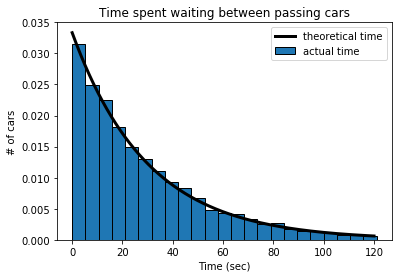

In [123]:
bins = np.linspace(0,120+1,24)
plt.hist(car_times, bins=bins, 
         density=True, edgecolor='k', label='actual time')
plt.plot(x, car_times_theory, '-k', 
         linewidth=3,label='theoretical time')
plt.title("Time spent waiting between passing cars")
plt.xlabel('Time (sec)')
plt.ylabel('# of cars')
plt.legend()
plt.show()

## Exercises

- **Example 2.16** Suppose Mr. and Mrs. Lockhorn agree to meet at the Hanover Inn between 5:00 and 6:00 P.M. on Tuesday. Suppose each arrives at a time between 5:00 and 6:00 chosen at random with uniform probability. What is the distribution function for the length of time that the first to arrive has to wait for the other? What is the density function?

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

mr_lock, mrs_lock = np.random.uniform(0, 60, size=(2,10000))
diff = np.abs(mr_lock - mrs_lock)

<BarContainer object of 30 artists>

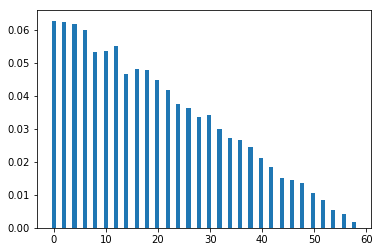

In [18]:
# plt.hist(
#     diff, bins=30,
#     density=True,
#     edgecolor='k',
# );
height, bins = np.histogram(diff, 30, )
height = height/height.sum()
bins = bins[:-1]
# height
# len(bins), len(height)
plt.bar(bins, height)

**Example 2.17**

In [33]:
lambda_ = 1/30
X = np.log(np.random.uniform(0,1,10000)) * (-1/lambda_)
Y = X[X > 15] - 15
Y.mean()

30.418653679121338

**Infinite Tree**  
**Example 2.18** Consider an experiment in which a fair coin is tossed repeatedly,
without stopping. We have seen in Example 1.6 that, for a coin tossed n times, the
natural sample space is a binary tree with n stages. On this evidence we expect
that for a coin tossed repeatedly, the natural sample space is a binary tree with an
infinite number of stages, as indicated in Figure 2.22.

In [64]:

tosses = np.random.randint(0,2,(1000000,20))
# numbers = np.zeros(tosses.shape[0])
numbers = tosses @ np.logspace(-1,-20,num=20,base=2)

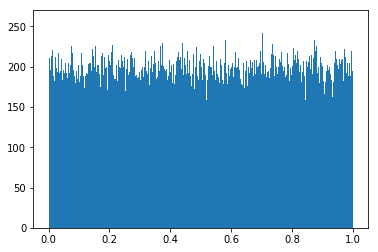

In [65]:
plt.hist(numbers, bins=5000)
plt.show()

## Exercises

**2**. Suppose you choose a real number $X$ from the interval $[2, 10]$ with a density function of the form $f (x) = Cx$ , where $C$ is a constant.  
-  Find $C$.
-  Find $P (E)$, where $E = [a, b]$ is a subinterval of $[2, 10]$.
-  Find $P (X > 5)$, $P (X < 7)$, and $P (X^2 − 12X + 35 > 0)$

---
1. Given that $f(x)$ is a distribution function, then   $\displaystyle\int_2^{10}f(x)\,dx = 1$.  
Then $ C = \frac{1}{48} $.

2. $P(E) = \displaystyle\int_a^b \frac{1}{48} x \,dx = \frac{b^2 - a^2}{96}$

3. 
    - $P(X>5) = \displaystyle\int_5^{10}\frac{x}{48}\,dx=\frac{75}{96}$
    - $P(X<7) = \frac{45}{96}$
    - Factorize quadratic equation to get $(X-5)\cdot(X-7)>0$. <br> This holds when either $X > 7$ or $ X < 5 $. So, $P(\cdots) = (1-\frac{45}{96}) + (1 - \frac{75}{96}) = \frac{3}{4}$

**4** Suppose you throw a dart at a circular target of radius 10 inches. Assuming
that you hit the target and that the coordinates of the outcomes are chosen
at random, find the probability that the dart falls  
(a) within 2 inches of the center.  
(b) within 2 inches of the rim.  
(c) within the first quadrant of the target.  
(d) within the first quadrant and within 2 inches of the rim.  

---
It is given that the $(x,y)$ is chosen from uniform distribution in range of $[-10,10]$. It is also implied by 'Assuming that you hit the target...' that any probability we work with must be divided by the area of the circle $\pi 10^2$. Our random variable $Z$ is then $\frac{\sqrt{X^2 + Y^2} }{\pi 10^2}$ which is just $\frac{Area of interest}{Area of circle}$


- $P(Z \le 2) = \frac{4\pi}{10^2\pi} = \frac{1}{25}$
- $P(Z \ge 8) = 1 - \frac{64}{100} = \frac{36}{100}$
- $P(angle(Z) \in [0,\frac{\pi}{2}]) = \frac{1}{4}$
- $P(angle(Z) \in [0,\frac{\pi}{2}] \land Z \ge 8) = \frac{1}{4} \cdot \frac{36}{100} = \frac{9}{100}$

**6** Assume that a new light bulb will burn out after $t$ hours, where $t$ is chosen from $[0, \infty)$ with an exponential density  
<center> $f (t) = \lambda \exp^{−\lambda t}$ .  </center>  

In this context, $\lambda$ is often called the failure rate of the bulb.  

(a) Assume that $\lambda = 0.01$, and find the probability that the bulb will not burn out before $T$ hours. This probability is often called the reliability of the bulb.  
(b) For what $T$ is the reliability of the bulb $= 1/2$?

---
- Equivalent to what is probability that burnout will happen after $T$ hours? $P(T \le t) = \displaystyle\int_T^\infty 0.01 \exp^{-0.01t} = -\exp^{-0.01t}\Big{|}_T^\infty = 0 - ( -\exp^{-0.01T}) = \exp^{-0.01T}$ 
- $1/2 = \exp^{-0.01T} \to \ln{1/2} = -0.01T \to T = \frac{\ln{1/2}}{-0.01} \approx 69.3147181$

**9** Suppose that we have a sequence of occurrences. We assume that the time
X between occurrences is exponentially distributed with λ = 1/10, so on the
average, there is one occurrence every 10 minutes (see Example 2.17). You
come upon this system at time 100, and wait until the next occurrence. Make
a conjecture concerning how long, on the average, you will have to wait. Write
a program to see if your conjecture is right.

---
The system is memoryless. Therefore, on averate, I will have to wait 10 minutes more to see another occurence.

In [68]:
occ_times = np.random.exponential(10, (1000,))
occ_times.mean()

10.260773114998006

**11** For examples such as those in Exercises 9 and 10, it might seem that at least
you should not have to wait on average more than 10 minutes if the average
time between occurrences is 10 minutes. Alas, even this is not true. To see
why, consider the following assumption about the times between occurrences.
Assume that the time between occurrences is 3 minutes with probability .9
and 73 minutes with probability .1. Show by simulation that the average time
between occurrences is 10 minutes, but that if you come upon this system at
time 100, your average waiting time is more than 10 minutes.

---

In [147]:
occ_times = np.random.exponential(10,(10000,25))
occ_times = occ_times.cumsum(axis=1)
occ_times = [np.diff(times[times>100]) for times in occ_times]
occ_times_mean = [np.mean(times) for times in occ_times if len(times) > 0]
np.mean(occ_times_mean)

# sum(occ_times)/len(occ_times)
# after_arrival = 
# after_arrival = np.diff(after_arrival,axis=1)
# after_arrival.mean(axis=0)

9.968044049814809

**12** Take a stick of unit length and break it into three pieces, choosing the break
points at random. (The break points are assumed to be chosen simultaneously.) What is the probability that the three pieces can be used to form a
triangle? Hint: The sum of the lengths of any two pieces must exceed the
length of the third, so each piece must have length < 1/2. Now use Exer
cise 8(g).  

---

In [102]:
#three pieces, 2 breakpoints
brptA,brptB = np.random.uniform(0,1,(2,10000)) 
len_a = np.min([brptA,brptB],axis=0)
len_b = np.abs(brptA - brptB)
len_c = 1 - np.max([brptA,brptB],axis=0)

def is_triangle(a,b,c):
    return (a + b >= c) & (b + c >= a) & (a + c >= b)

is_triangle(len_a,len_b,len_c).mean()

0.2446

**22** Write a program to carry out the following experiment. A coin is tossed 100
times and the number of heads that turn up is recorded. This experiment
is then repeated 1000 times. Have your program plot a bar graph for the
proportion of the 1000 experiments in which the number of heads is n, for
each n in the interval [35, 65]. Does the bar graph look as though it can be fit
with a normal curve?

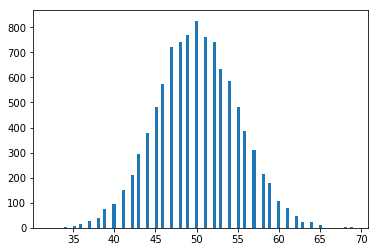

In [166]:
tosses = np.random.randint(0,2,(10000,100))
heads = (tosses == 1).sum(axis=1)
plt.hist(heads, 5)
plt.show()